In [210]:
import numpy as np
from scipy.stats import poisson
from collections import defaultdict
import matplotlib.pyplot as plt
from time import sleep

In [190]:
alpha = 10
N = 50 # number of objects
F = 100

In [191]:
z = defaultdict(lambda:[])
z_arr = []
max_k = -1
# traverse each object
for i in range(N):
    if i != 0:
        max_k = max(z_arr)
        for k in range(F):
            # bernoulli
            m_k = z_arr.count(k)
            p = m_k/(i+1)
            #print(i,k,m_k, p, z_arr)
            positive = np.random.choice([0,1],p=[1-p,p])
            if positive:
                z[i].append(k)
                z_arr.append(k)
    r = poisson.rvs(alpha/(i+1))
    for j in range(1,r+1):
        z[i].append(max_k+j)
        z_arr.append(max_k+j)

In [193]:
Z = [[] for i in range(N)]
for i in range(N):
    for k in range(max_k):
        Z[i].append(int(k in z[i]))
        #print(k, z[i])

In [194]:
Z_=np.array(Z)

In [223]:
def update(i):
    G[Z_<0.5] = [1,1,1]
    G[Z_>0.5] = [0,0,0]
    G[i:][:][:] = 1
    return G

<IPython.core.display.Javascript object>


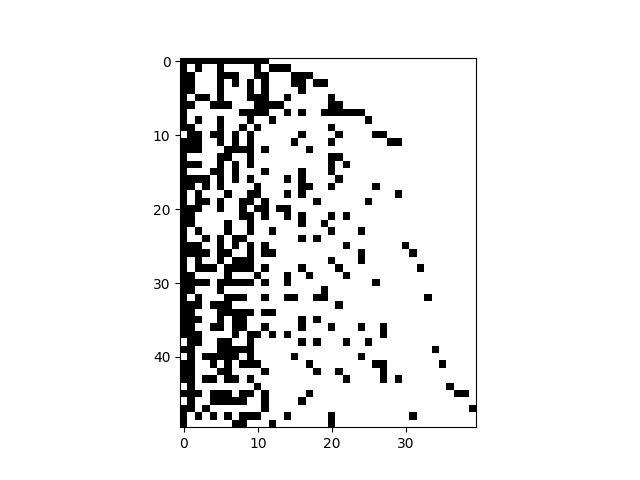

In [254]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()


fig.show()
fig.canvas.draw()


for i in range(N+1):
    ax.clear()
    G = update(i)
    ax.imshow(G,interpolation='nearest')
    fig.canvas.draw()
    sleep(0.1)